In [121]:
import cv2
import numpy as np
from pathlib import Path
%matplotlib inline
from matplotlib import pyplot as plt
import os
import random as rng
from PIL import Image as PILImage

In [2]:
problems_path = Path('../../problems')
print(list(problems_path.iterdir()))

[PosixPath('../../problems/10.png'), PosixPath('../../problems/8.png'), PosixPath('../../problems/6.png'), PosixPath('../../problems/3.png'), PosixPath('../../problems/4.png'), PosixPath('../../problems/5.png'), PosixPath('../../problems/2.png'), PosixPath('../../problems/9.png'), PosixPath('../../problems/7.png'), PosixPath('../../problems/1.png')]


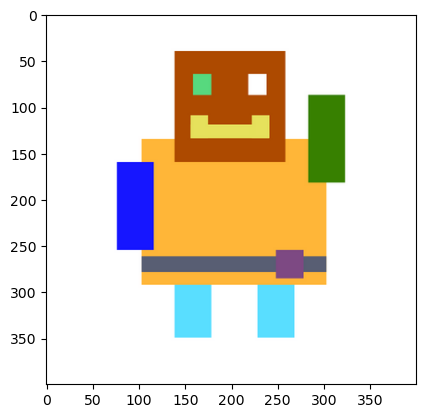

In [124]:
img = cv2.imread(str(problems_path / '2.png'), cv2.IMREAD_UNCHANGED)
plt.imshow(img)
plt.show()

In [125]:
pil_img = PILImage.fromarray(img)
print(pil_img)

<PIL.Image.Image image mode=RGBA size=400x400 at 0x7FAA024552A0>


In [142]:
paletted_img = pil_img.quantize(10, method=PILImage.Quantize.LIBIMAGEQUANT)
print(paletted_img)

<PIL.Image.Image image mode=P size=400x400 at 0x7FA9E970EC20>


In [147]:
n_img = np.asarray(paletted_img)

In [148]:
np.unique(n_img)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [154]:
colors = np.array(paletted_img.getpalette(None)).reshape((-1, 4))[:10]
label_map = np.asarray(paletted_img)
print(colors)

[[255 182  57 255]
 [255 255 254 255]
 [173  74   0 255]
 [ 89 222 239 255]
 [100  88 120 255]
 [ 21  21 255 255]
 [ 54 128   0 255]
 [231 226  94 255]
 [180 151  75 255]
 [192 213 233 255]]


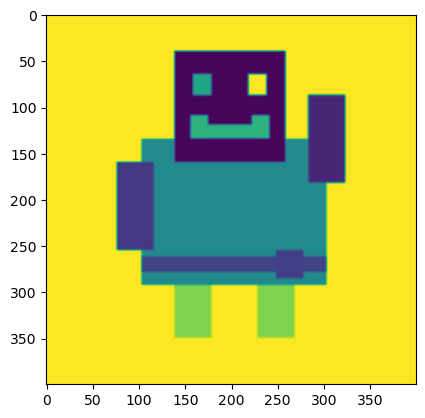

In [119]:
src_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
src_gray = cv2.blur(src_gray, (3,3))
plt.imshow(src_gray)
plt.show()

In [115]:
threshold = 20

canny_output = cv2.Canny(src_gray, threshold, threshold * 2)
# Find contours
contours, hierarchy = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Draw contours
drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
step = 255. / len(contours)
new_cnts = []
for i in range(len(contours)):
    # color = (255 - step * i, step * i, 100)
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    eps = 0.1 * cv2.arcLength(contours[i], True)
    app_cnt = cv2.approxPolyDP(contours[i], eps, True)
    new_cnts.append(app_cnt)
    cv2.drawContours(drawing, contours, i, color, 2, cv2.LINE_8)

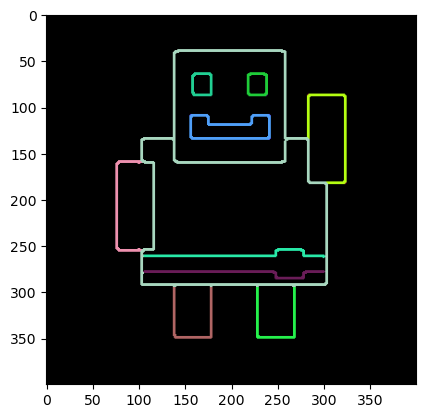

In [116]:
plt.imshow(drawing)

In [106]:
len(new_cnts)

57

In [107]:
boxes = [cv2.boundingRect(cnt) for cnt in new_cnts]

In [108]:
b_drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

for (x,y,w,h) in boxes:
    print((x,y,w,h))
    b_drawing = cv2.rectangle(b_drawing,(x,y),(x+w,y+h),(0,255,0),0, cv2.LINE_8)

(268, 294, 1, 56)
(227, 294, 41, 57)
(228, 295, 41, 55)
(139, 294, 41, 57)
(138, 294, 1, 54)
(138, 295, 41, 55)
(268, 291, 36, 2)
(228, 292, 40, 1)
(178, 292, 51, 1)
(139, 292, 40, 1)
(103, 292, 36, 1)
(245, 279, 37, 1)
(280, 278, 22, 1)
(105, 278, 142, 1)
(106, 278, 195, 1)
(299, 261, 3, 3)
(105, 255, 147, 7)
(275, 255, 26, 7)
(101, 254, 3, 39)
(250, 254, 27, 1)
(106, 261, 195, 2)
(99, 253, 3, 3)
(76, 252, 4, 4)
(283, 87, 41, 96)
(76, 161, 1, 93)
(106, 159, 11, 97)
(76, 159, 4, 4)
(104, 158, 4, 3)
(138, 157, 5, 4)
(255, 136, 4, 25)
(283, 135, 2, 48)
(104, 40, 200, 253)
(101, 134, 5, 27)
(221, 110, 2, 10)
(175, 110, 1, 10)
(156, 111, 86, 22)
(157, 110, 86, 25)
(155, 108, 20, 27)
(156, 110, 86, 24)
(303, 88, 21, 204)
(260, 86, 64, 49)
(218, 65, 21, 23)
(158, 66, 1, 20)
(218, 64, 3, 23)
(158, 64, 4, 4)
(219, 64, 21, 25)
(159, 64, 21, 25)
(220, 64, 17, 1)
(218, 65, 21, 23)
(160, 64, 18, 1)
(159, 65, 20, 23)
(138, 41, 1, 118)
(138, 39, 6, 3)
(255, 39, 4, 96)
(142, 39, 114, 1)
(77, 40, 246,

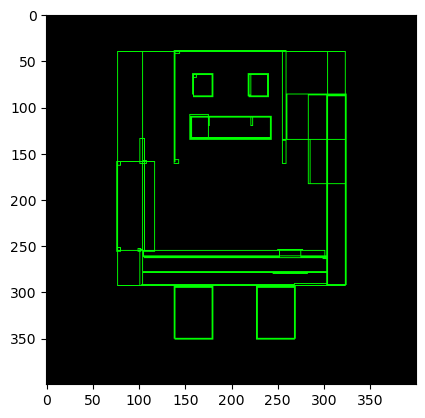

In [109]:
plt.imshow(b_drawing)

In [110]:
np.any(b_drawing > 0)

True

In [111]:
colors = []
for (x,y,w,h) in boxes:
    img_slice = img[y:y+h, x:x+w]
    colors.append(np.mean(img_slice, axis=(0, 1)).astype(np.uint8))
print(colors)

[array([170, 238, 254], dtype=uint8), array([ 98, 223, 254], dtype=uint8), array([ 93, 222, 254], dtype=uint8), array([ 97, 223, 254], dtype=uint8), array([239, 251, 254], dtype=uint8), array([ 94, 222, 254], dtype=uint8), array([254, 190,  79], dtype=uint8), array([213, 191, 105], dtype=uint8), array([254, 199, 105], dtype=uint8), array([213, 191, 105], dtype=uint8), array([254, 200, 106], dtype=uint8), array([148,  92, 117], dtype=uint8), array([ 96,  98, 111], dtype=uint8), array([ 96,  98, 111], dtype=uint8), array([100,  94, 114], dtype=uint8), array([142, 122,  95], dtype=uint8), array([250, 178,  58], dtype=uint8), array([235, 166,  66], dtype=uint8), array([235, 228, 222], dtype=uint8), array([244, 173,  62], dtype=uint8), array([163, 127,  92], dtype=uint8), array([ 98,  97, 254], dtype=uint8), array([110, 110, 255], dtype=uint8), array([ 62, 132,   8], dtype=uint8), array([190, 190, 255], dtype=uint8), array([ 34,  30, 242], dtype=uint8), array([110, 110, 255], dtype=uint8), 

In [112]:
b_drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

for (x,y,w,h), color in zip(boxes, colors):
    print((x,y,w,h))
    b_drawing = cv2.rectangle(b_drawing,(x,y),(x+w,y+h),color.tolist(),-1, cv2.LINE_8)

(268, 294, 1, 56)
(227, 294, 41, 57)
(228, 295, 41, 55)
(139, 294, 41, 57)
(138, 294, 1, 54)
(138, 295, 41, 55)
(268, 291, 36, 2)
(228, 292, 40, 1)
(178, 292, 51, 1)
(139, 292, 40, 1)
(103, 292, 36, 1)
(245, 279, 37, 1)
(280, 278, 22, 1)
(105, 278, 142, 1)
(106, 278, 195, 1)
(299, 261, 3, 3)
(105, 255, 147, 7)
(275, 255, 26, 7)
(101, 254, 3, 39)
(250, 254, 27, 1)
(106, 261, 195, 2)
(99, 253, 3, 3)
(76, 252, 4, 4)
(283, 87, 41, 96)
(76, 161, 1, 93)
(106, 159, 11, 97)
(76, 159, 4, 4)
(104, 158, 4, 3)
(138, 157, 5, 4)
(255, 136, 4, 25)
(283, 135, 2, 48)
(104, 40, 200, 253)
(101, 134, 5, 27)
(221, 110, 2, 10)
(175, 110, 1, 10)
(156, 111, 86, 22)
(157, 110, 86, 25)
(155, 108, 20, 27)
(156, 110, 86, 24)
(303, 88, 21, 204)
(260, 86, 64, 49)
(218, 65, 21, 23)
(158, 66, 1, 20)
(218, 64, 3, 23)
(158, 64, 4, 4)
(219, 64, 21, 25)
(159, 64, 21, 25)
(220, 64, 17, 1)
(218, 65, 21, 23)
(160, 64, 18, 1)
(159, 65, 20, 23)
(138, 41, 1, 118)
(138, 39, 6, 3)
(255, 39, 4, 96)
(142, 39, 114, 1)
(77, 40, 246,

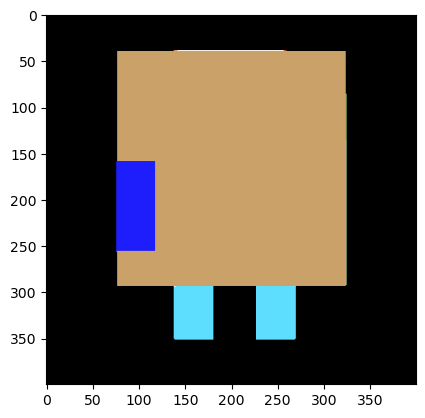

In [113]:
plt.imshow(b_drawing)

In [114]:
print(hierarchy)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [21 19 -1 -1]
  [22 20 -1 -1]
  [23 21 -1 -1]
  [24 22 -1 -1]
  [25 23 -1 -1]
  [26 24 -1 -1]
  [27 25 -1 -1]
  [28 26 -1 -1]
  [29 27 -1 -1]
  [30 28 -1 -1]
  [31 29 -1 -1]
  [32 30 -1 -1]
  [33 31 -1 -1]
  [34 32 -1 -1]
  [35 33 -1 -1]
  [36 34 -1 -1]
  [37 35 -1 -1]
  [38 36 -1 -1]
  [39 37 -1 -1]
  [40 38 -1 -1]
  [41 39 -1 -1]
  [42 40 -1 -1]
  [43 41 -1 -1]
  [44 42 -1 -1]
  [45 43 -1 -1]
  [46 44 -1 -1]
  [47 45 -1 -1]
  [48 46 -1 -1]
  [49 47 -1 -1]
  [50 48 -1 -1]
  [51 49 -1 -1]
  [52 50 -1 -1]
  [53 51 -1 -1]
  [54 52 -1 -1]
  [55 53 -1 -1]
  [-1 54 56 -1]
  [-1 -1 -1 55]]]
